In [1]:

import numpy as np 
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import optuna

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 91.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 99.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [25]:
train_df  = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv',index_col = "id")
test_df  = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv',index_col = "id")
indexes  = test_df.index
og_data = pd.read_csv('/kaggle/input/abalone-uci/abalone_original.csv')
new_column_names = ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Whole_weight_1',
 'Whole_weight_2',
 'Shell_weight',
 'Rings']
train_df.columns = new_column_names
og_data.columns = new_column_names
test_df.columns  = new_column_names[:-1]
train_df = pd.concat([og_data, train_df], axis=0)

In [26]:
train_df

,Sex,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings
0,M,91.000,73.000,19.000,102.8000,44.9000,20.2000,30.0000,15
1,M,70.000,53.000,18.000,45.1000,19.9000,9.7000,14.0000,7
2,F,106.000,84.000,27.000,135.4000,51.3000,28.3000,42.0000,9
3,M,88.000,73.000,25.000,103.2000,43.1000,22.8000,31.0000,10
4,I,66.000,51.000,16.000,41.0000,17.9000,7.9000,11.0000,7
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [27]:
display(train_df.head(),train_df.describe(),train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole_weight    94792 non-null  float64
 5   Whole_weight_1  94792 non-null  float64
 6   Whole_weight_2  94792 non-null  float64
 7   Shell_weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


,Sex,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings
count,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000
mean,5.112244,3.978629,1.359050,8.057954,3.492860,1.753524,2.320755,9.707233
std,21.988761,17.173524,5.963542,39.626080,17.389725,8.696065,11.373898,3.178704
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.110000,0.438500,0.186000,0.090500,0.126500,8.000000
50%,0.550000,0.430000,0.140000,0.827500,0.341000,0.171500,0.235000,9.000000
75%,0.610000,0.475000,0.165000,1.114000,0.490500,0.244500,0.320000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


None

In [28]:
missing_values_in_columns = train_df.isnull().any()
missing_values_in_columns

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Whole_weight_1    False
Whole_weight_2    False
Shell_weight      False
Rings             False
dtype: bool

In [29]:
one_hot_encoded = pd.get_dummies(train_df['Sex'], prefix='Sex')
train_df = pd.concat([train_df, one_hot_encoded], axis=1)
train_df.drop('Sex', axis=1, inplace=True)
one_hot_encoded = pd.get_dummies(test_df['Sex'], prefix='Sex')
test_df = pd.concat([test_df, one_hot_encoded], axis=1)
test_df.drop('Sex', axis=1, inplace=True)
test_df[['Sex_F','Sex_M','Sex_I']] = test_df[['Sex_F','Sex_M','Sex_I']].astype(int)
train_df[['Sex_F','Sex_M','Sex_I']] = train_df[['Sex_F','Sex_M','Sex_I']].astype(int)


In [30]:
display(train_df.info(),train_df.head(),train_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 90614
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          94792 non-null  float64
 1   Diameter        94792 non-null  float64
 2   Height          94792 non-null  float64
 3   Whole_weight    94792 non-null  float64
 4   Whole_weight_1  94792 non-null  float64
 5   Whole_weight_2  94792 non-null  float64
 6   Shell_weight    94792 non-null  float64
 7   Rings           94792 non-null  int64  
 8   Sex_F           94792 non-null  int64  
 9   Sex_I           94792 non-null  int64  
 10  Sex_M           94792 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 8.7 MB


None

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,0,0,1
1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,0,0,1
2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,1,0,0
3,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,0,0,1
4,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,0,1,0


,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
count,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000,94792.000000
mean,5.112244,3.978629,1.359050,8.057954,3.492860,1.753524,2.320755,9.707233,0.293295,0.363269,0.343436
std,21.988761,17.173524,5.963542,39.626080,17.389725,8.696065,11.373898,3.178704,0.455275,0.480944,0.474858
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.110000,0.438500,0.186000,0.090500,0.126500,8.000000,0.000000,0.000000,0.000000
50%,0.550000,0.430000,0.140000,0.827500,0.341000,0.171500,0.235000,9.000000,0.000000,0.000000,0.000000
75%,0.610000,0.475000,0.165000,1.114000,0.490500,0.244500,0.320000,11.000000,1.000000,1.000000,1.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000,1.000000,1.000000,1.000000


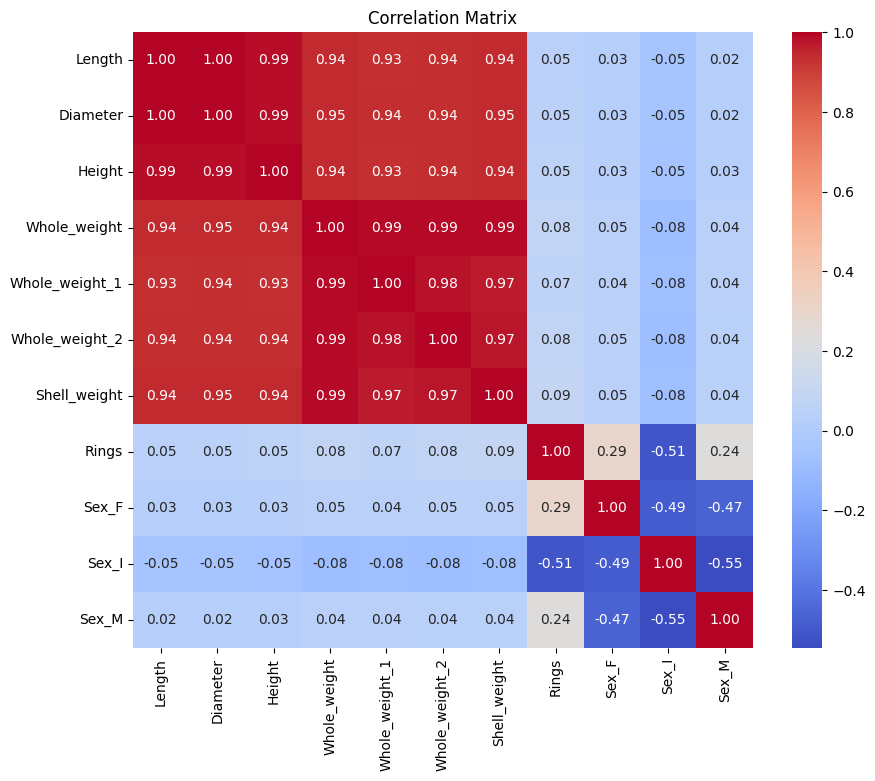

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix =train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


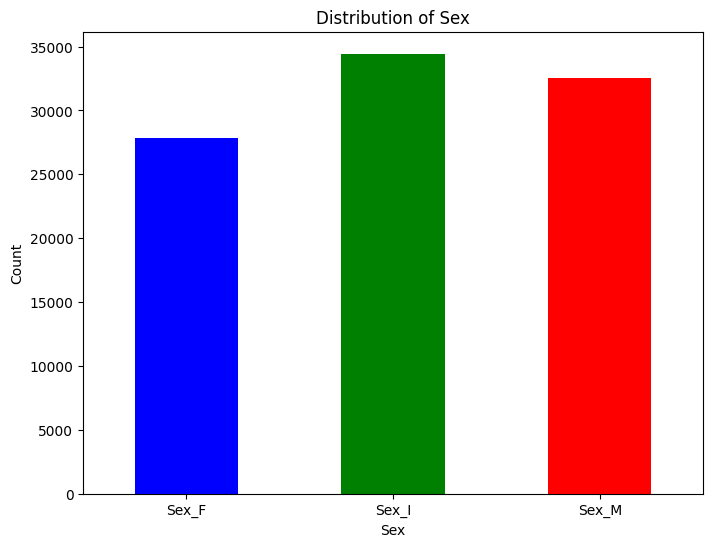

In [32]:

sex_counts = train_df[['Sex_F', 'Sex_I', 'Sex_M']].sum()

plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

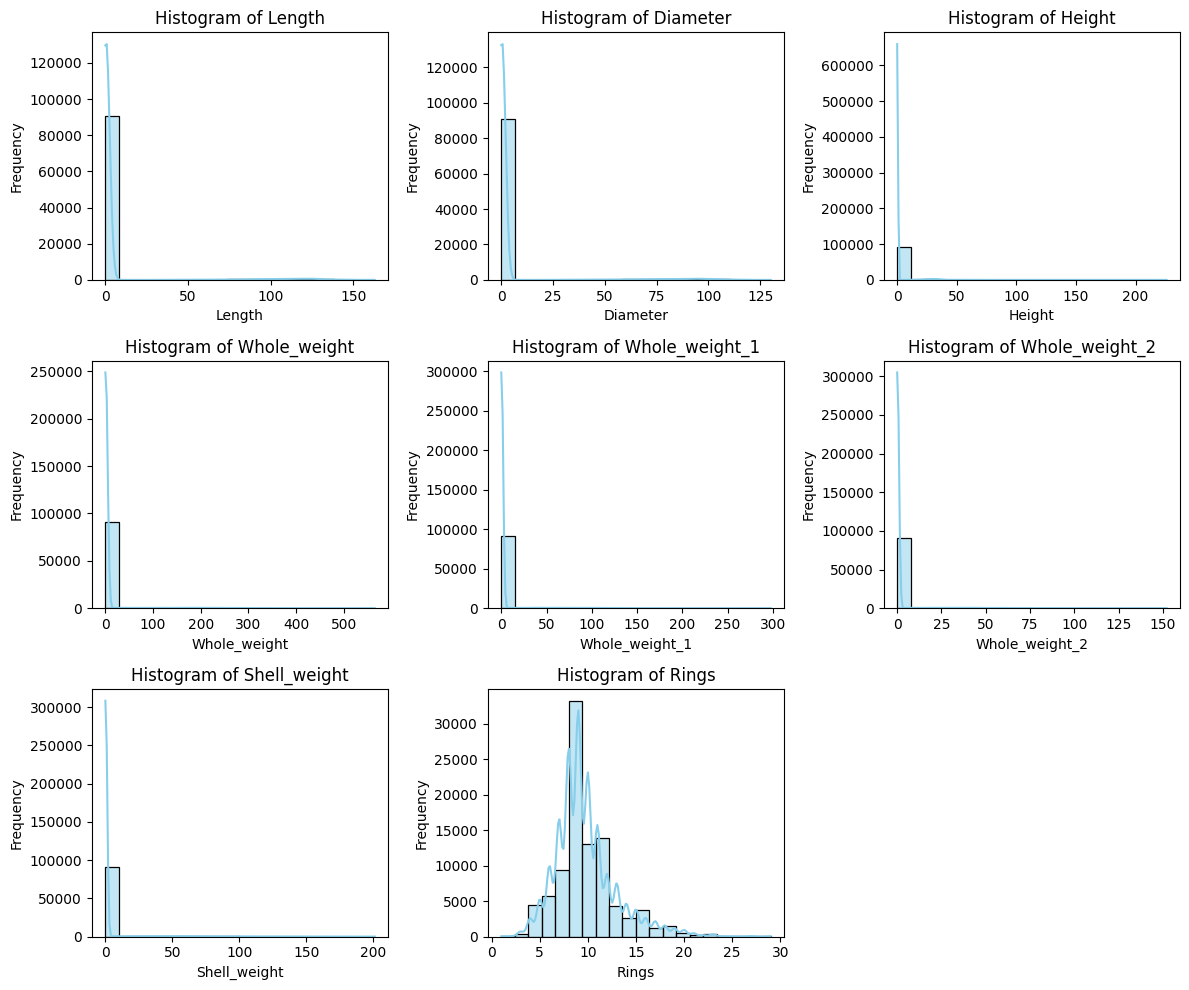

In [33]:

numerical_columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Whole_weight_1', 'Whole_weight_2', 'Shell_weight', 'Rings']

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [34]:
import scipy
skew_df = pd.DataFrame(train_df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(train_df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df
skew_df = skew_df.iloc[:7,:]
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Length,4.775277,4.775277,True
1,Diameter,4.812652,4.812652,True
2,Height,5.415535,5.415535,True
3,Whole_weight,6.347473,6.347473,True
4,Whole_weight_1,6.587140,6.587140,True
5,Whole_weight_2,6.450624,6.450624,True
6,Shell_weight,6.369808,6.369808,True


In [35]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    train_df[column] = np.log1p(train_df[column])


In [36]:
data1 = train_df.copy()

In [37]:
train_df

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,4.521789,4.304065,2.995732,4.642466,3.826465,3.054001,3.433987,15,0,0,1
1,4.262680,3.988984,2.944439,3.830813,3.039749,2.370244,2.708050,7,0,0,1
2,4.672829,4.442651,3.332205,4.915592,3.956996,3.377588,3.761200,9,1,0,0
3,4.488636,4.304065,3.258097,4.646312,3.786460,3.169686,3.465736,10,0,0,1
4,4.204693,3.951244,2.833213,3.737670,2.939162,2.186051,2.484907,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.288931,0.211071,0.072321,0.147126,0.066256,0.036332,0.044017,6,0,0,1
90611,0.441476,0.354172,0.139762,0.630740,0.326783,0.166785,0.215111,9,0,0,1
90612,0.361165,0.285179,0.090754,0.278767,0.140631,0.075571,0.078349,6,0,1,0
90613,0.296394,0.239017,0.072321,0.182322,0.093490,0.047837,0.067659,6,0,1,0


In [38]:
target = train_df['Rings']
train_df = train_df.drop('Rings', axis=1)
train_df

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Sex_F,Sex_I,Sex_M
0,4.521789,4.304065,2.995732,4.642466,3.826465,3.054001,3.433987,0,0,1
1,4.262680,3.988984,2.944439,3.830813,3.039749,2.370244,2.708050,0,0,1
2,4.672829,4.442651,3.332205,4.915592,3.956996,3.377588,3.761200,1,0,0
3,4.488636,4.304065,3.258097,4.646312,3.786460,3.169686,3.465736,0,0,1
4,4.204693,3.951244,2.833213,3.737670,2.939162,2.186051,2.484907,0,1,0
...,...,...,...,...,...,...,...,...,...,...
90610,0.288931,0.211071,0.072321,0.147126,0.066256,0.036332,0.044017,0,0,1
90611,0.441476,0.354172,0.139762,0.630740,0.326783,0.166785,0.215111,0,0,1
90612,0.361165,0.285179,0.090754,0.278767,0.140631,0.075571,0.078349,0,1,0
90613,0.296394,0.239017,0.072321,0.182322,0.093490,0.047837,0.067659,0,1,0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df)

train_df = pd.DataFrame(scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
train_df

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Sex_F,Sex_I,Sex_M
0,4.504552,4.540538,4.137485,4.160590,4.207886,4.014813,4.185130,-0.644218,-0.755329,1.382660
1,4.206986,4.163140,4.059706,3.295434,3.228191,3.019800,3.199677,-0.644218,-0.755329,1.382660
2,4.678010,4.706533,4.647695,4.451719,4.370436,4.485700,4.629319,1.552269,-0.755329,-0.723243
3,4.466479,4.540538,4.535322,4.164689,4.158067,4.183159,4.228229,-0.644218,-0.755329,1.382660
4,4.140392,4.117935,3.891049,3.196151,3.102930,2.751761,2.896762,-0.644218,1.323926,-0.723243
...,...,...,...,...,...,...,...,...,...,...
90610,-0.356554,-0.361966,-0.295439,-0.631072,-0.474691,-0.376539,-0.416725,-0.644218,-0.755329,1.382660
90611,-0.181369,-0.190563,-0.193174,-0.115580,-0.150258,-0.186703,-0.184466,-0.644218,-0.755329,1.382660
90612,-0.273600,-0.273201,-0.267487,-0.490754,-0.382072,-0.319438,-0.370120,-0.644218,1.323926,-0.723243
90613,-0.347984,-0.328493,-0.295439,-0.593557,-0.440776,-0.359797,-0.384632,-0.644218,1.323926,-0.723243


/tmp/ipykernel_34/414263105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_34/414263105.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for

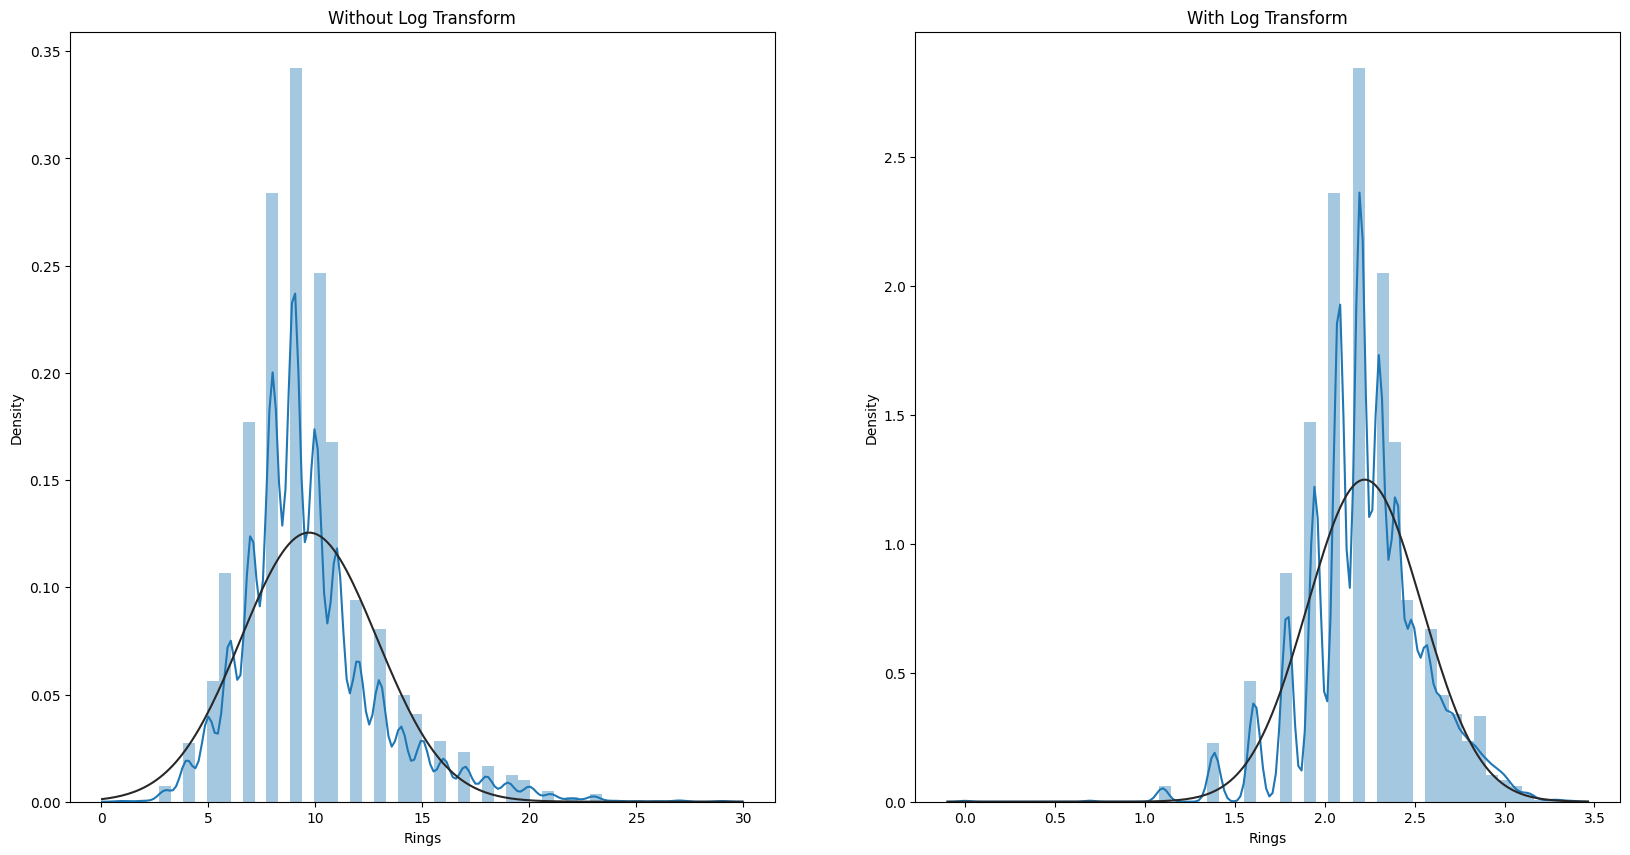

In [43]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title("With Log Transform")

plt.show()

In [44]:
log_target = np.log(target)

In [45]:
x_train , x_test , y_train, y_test = train_test_split(train_df, log_target , test_size = 0.1)

In [51]:
!pip install --upgrade pycaret scikit-learn



In [53]:
temp = pd.concat([train_df, log_target] , axis =1)
temp

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,4.504552,4.540538,4.137485,4.160590,4.207886,4.014813,4.185130,-0.644218,-0.755329,1.382660,2.708050
1,4.206986,4.163140,4.059706,3.295434,3.228191,3.019800,3.199677,-0.644218,-0.755329,1.382660,1.945910
2,4.678010,4.706533,4.647695,4.451719,4.370436,4.485700,4.629319,1.552269,-0.755329,-0.723243,2.197225
3,4.466479,4.540538,4.535322,4.164689,4.158067,4.183159,4.228229,-0.644218,-0.755329,1.382660,2.302585
4,4.140392,4.117935,3.891049,3.196151,3.102930,2.751761,2.896762,-0.644218,1.323926,-0.723243,1.945910
...,...,...,...,...,...,...,...,...,...,...,...
90610,-0.356554,-0.361966,-0.295439,-0.631072,-0.474691,-0.376539,-0.416725,-0.644218,-0.755329,1.382660,1.791759
90611,-0.181369,-0.190563,-0.193174,-0.115580,-0.150258,-0.186703,-0.184466,-0.644218,-0.755329,1.382660,2.197225
90612,-0.273600,-0.273201,-0.267487,-0.490754,-0.382072,-0.319438,-0.370120,-0.644218,1.323926,-0.723243,1.791759
90613,-0.347984,-0.328493,-0.295439,-0.593557,-0.440776,-0.359797,-0.384632,-0.644218,1.323926,-0.723243,1.791759


In [58]:
!pip install pycaret

In [10]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

X = train_df.drop(columns=['Rings'])
y = train_df['Rings']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'objective': 'regression',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'num_leaves': 64  
}
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_metric=rmsle)
y_pred = model.predict(X_val)
rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))
print("RMSLE:", rmsle_value)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 75833, number of used features: 10
[LightGBM] [Info] Start training from score 9.712935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
tune = False
if tune:
    def objective(trial):
        params = {
            'objective': 'regression',
            'learning_rate': 0.1,
            'n_estimators': 100,
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10),
            'subsample': trial.suggest_float('subsample', 0.1, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100)
            ,'verbose':0
        }

        model = lgb.LGBMRegressor(**params)

        model.fit(X_train, y_train, eval_metric=rmsle)

        y_pred = model.predict(X_val)

        rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))

        return rmsle_value
    study = optuna.create_study(direction='minimize')

    study.optimize(objective, n_trials=100)

    best_params = study.best_params
    print("Best params:", best_params)

    best_model = lgb.LGBMRegressor(**best_params)
    best_model.fit(X_train, y_train, eval_metric=rmsle)

    y_pred = best_model.predict(X_val)

    rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))
    print("RMSLE with best params:", rmsle_value)

In [ ]:
best_params = {'max_depth': 10, 'min_child_weight': 8.184691454196782, 'subsample': 0.9839723550083833, 'colsample_bytree': 0.8342315861129612, 'num_leaves': 95}

best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X, y, eval_metric=rmsle)
y_pred =best_model.predict(X_val)

rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))
print("RMSLE with best params:", rmsle_value)

In [ ]:
pred =best_model.predict(test_df)
submission = pd.DataFrame()
submission["id"] = indexes
submission["Rings"] = pred

submission.to_csv("submission.csv",header=True,index=False)
submission